##  一、数据可视化和摘要

## 1.1  数据集摘要

### 1.1.1   数据介绍
  
  根据Variety杂志的报道，“为了确定年度最热门的视频，YouTube使用了多种因素，包括衡量用户互动（观看次数，分享，评论和喜欢）。请注意，它们不是整个日历年中观看次数最多的视频“。 YouTube趋势列表中的优秀表演者是音乐视频（例如着名的男性化的“Gangam Style”），名人和/或真人秀电视节目，以及YouTube众所周知的随机照相机病毒视频。
此数据集是热门YouTube热门视频的每日记录。
该数据集包括每日热门YouTube视频的数月（和计数）数据。数据包括美国，GB，DE，CA和FR地区（分别为美国，英国，德国，加拿大和法国），每天最多可列出200个热门视频。数据集中包含各个地区的视频的[video_id], [trending_date], [title], [channel_title], [category_id],[publish_time], [tags], [views], [likes], [dislikes], [comment_count],[humbnail_link],[comments_disabled],[ratings_disable]，[ideo_error_or_removed],[description']等信息
      

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame,Series
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
filename='C:/Users/nancy/Downloads/YouTube/INvideos.csv'
df=pd.read_csv(filename)

In [3]:
cols = df.columns
print(df.shape)
print(cols)

(37352, 16)
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


数据一共有16列，37352行。
 
 其中，标称属性有[video_id], [trending_date], [title], [channel_title], [category_id],[publish_time], [tags],[thumbnail_link],[comments_disabled],[ratings_disable]，[video_error_or_removed],[description']。 数值属性有[views], [likes], [dislikes],[comment_count]。

In [4]:
cname='channel_title'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

channel_title
#Mind Warehouse                                                                                   2
1 Kg Biriyani                                                                                    48
1 Minutes news                                                                                   12
10 DEGREE INDIAN FACTS                                                                           37
10TVNewsChannel                                                                                  23
2 Minute News Today                                                                               7
2 Minutes News                                                                                   30
20th Century Fox                                                                                 38
24 Tamil Health & Beauty                                                                          3
24 ghanta                                                                             

In [5]:
cname='category_id'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

category_id
1      1658
2        72
10     3858
15        3
17      731
19        8
20       66
22     2624
23     3429
24    16712
25     5241
26      845
27     1227
28      552
29      105
30       16
43      205
dtype: int64


In [6]:
cname='publish_time'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

publish_time
2017-05-27T20:27:30.000Z     2
2017-11-07T06:01:50.000Z     3
2017-11-08T11:34:35.000Z     1
2017-11-08T12:27:17.000Z     1
2017-11-08T15:06:03.000Z     1
2017-11-08T17:08:38.000Z     1
2017-11-09T06:39:38.000Z     1
2017-11-09T06:39:48.000Z     1
2017-11-09T10:28:36.000Z     2
2017-11-09T11:04:14.000Z     2
2017-11-09T11:31:14.000Z     1
2017-11-09T12:45:02.000Z     1
2017-11-09T17:00:02.000Z     1
2017-11-10T04:29:50.000Z     4
2017-11-10T05:04:00.000Z     1
2017-11-10T05:49:54.000Z     1
2017-11-10T08:51:25.000Z     1
2017-11-10T09:59:20.000Z     2
2017-11-10T10:15:39.000Z     1
2017-11-10T11:30:01.000Z     1
2017-11-10T11:36:01.000Z     1
2017-11-10T13:28:26.000Z     2
2017-11-10T14:11:33.000Z     2
2017-11-10T16:11:19.000Z     1
2017-11-10T16:43:22.000Z     1
2017-11-10T17:32:46.000Z     1
2017-11-10T17:56:57.000Z     1
2017-11-10T18:05:58.000Z     1
2017-11-10T20:00:04.000Z     2
2017-11-10T20:38:52.000Z     3
2017-11-10T20:45:14.000Z     1
2017-11-11T01:32:00.000Z  

In [7]:
cname='tags'
print(df[cname].head())
df.groupby(by=cname).size()


0    sharry mann|"sharry mann new song"|"sharry man...
1    पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...
2    Stylish Star Allu Arjun @ ChaySam Wedding Rece...
3    Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...
4    Filmylooks|"latest news"|"telugu movies"|"telu...
Name: tags, dtype: object


tags
#9RosesMedia|"Comedian Vijay Sai and His Wife Vanitha Phone Call Recording Voice #9Roses Media"|"Comedian Vijay Sai and His Wife Vanitha Phone Call Recording Voice"|"Comedian Vijay Sai and His Wife Vanitha Phone Call Recording"|"Vanitha Phone Call Recording"|"comedian vijay sai wife vanitha"|"comedian vijay sai"|"comedian vijay"|"comedian vijay sai phone call"|"comedian vijay sai wife phone call"|"tollywood"|"tollywood comedian"|"comedian vijay phone call"|"vijay sai wife vanitha"                                                                                                                                                       2
#9RosesMedia|"Jayasudha Emotional Speech at Sridevi Santhapa Sabha || Memories With Sridevi #9Roses Media"|"Jayasudha Emotional Speech"|"Jayasudha"|"Sridevi Santhapa Sabha"|"Sridevi"|"sridevi family"|"sridevi daughters"|"jhanvi kapoor"|"boney kapoor"|"sridevi movies"|"sridevi latest"|"tollywood"|"tollywood news"|"bollywood news"|"bollywood"|"telugu news"|

In [8]:
cname='comments_disabled'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

comments_disabled
False    36148
True      1204
dtype: int64


In [9]:
cname='ratings_disabled'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

ratings_disabled
False    36571
True       781
dtype: int64


In [10]:
cname='video_error_or_removed'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

video_error_or_removed
False    37341
True        11
dtype: int64


## 1.2  数据集可视化
 对[views], [likes], [dislikes],[comment_count]这四个数值属性给出了它们最大、最小、均值、中位数、四分位数及缺失值的个数。
 接着根据统计结果在剔除了缺失数据后绘制了它们的分布直方图，QQ图检和盒图，并对它们进行了分析。


### 1.2.1 [views]的可视化
根据下表可以看出[views]一共有3.735200e+04条记录，均值为1.060478e+06，最小值为4.024000e+03，中位数为3.045860e+05，剩下的四分位数分别为  1.239155e+05和 7.992912e+05，最大值是 1.254322e+08。

In [11]:
cname='views'
print(df[cname].describe())
loss=len(df)-df[cname].count()
print("缺失值个数：",loss)

count    3.735200e+04
mean     1.060478e+06
std      3.184932e+06
min      4.024000e+03
25%      1.239155e+05
50%      3.045860e+05
75%      7.992912e+05
max      1.254322e+08
Name: views, dtype: float64
缺失值个数： 0


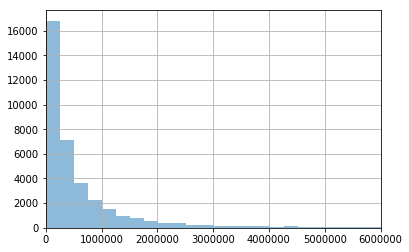

In [12]:
#直方图绘制
plt.xlim(0,6000000)
df[cname].hist(alpha=0.5,bins=500)
plt.show()

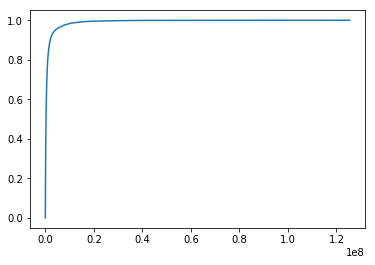

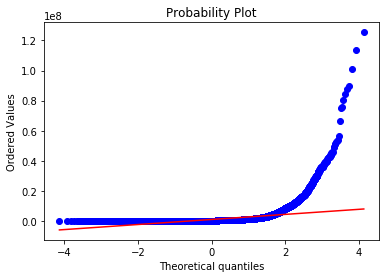

In [13]:
#累计分布图绘制
x=np.sort(df[cname])
y=np.arange(len(x))/float(len(x))
plt.plot(x,y)
plt.show()


#QQ图绘制
stats.probplot(df[cname], dist="norm", plot=plt)
plt.show()

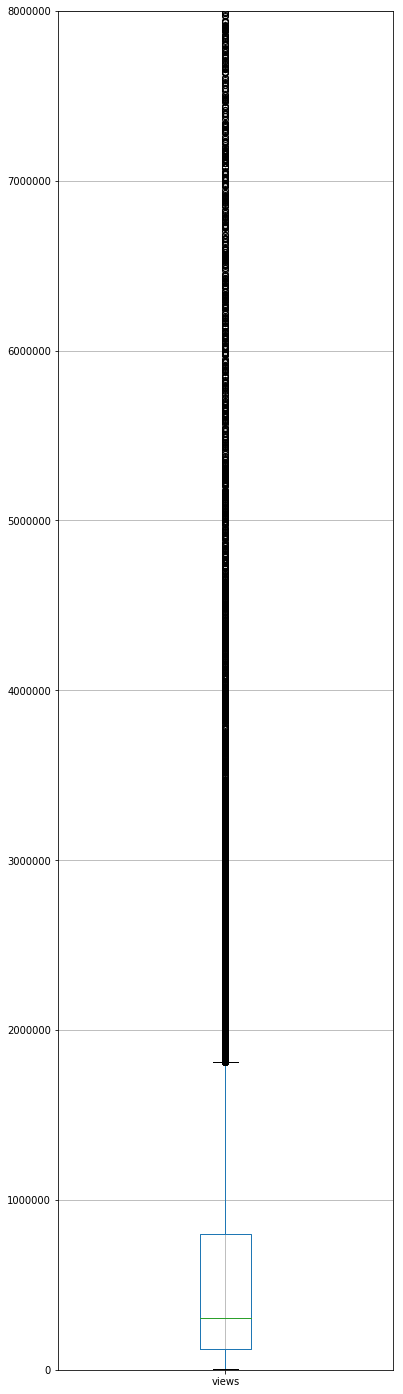

In [14]:
#盒图绘制
a=DataFrame(df,columns=[cname])
#a.boxplot()
a.boxplot(figsize=(6,25))
plt.ylim(0,8000000)
plt.show()


## 1.2.2[likes]的可视化

In [15]:
cname='likes'
a=DataFrame(df,columns=[cname])
a=a.dropna()#去除缺失值
print(a[cname].describe())
loss=len(df)-a[cname].count()
print("缺失值个数：",loss)


count    3.735200e+04
mean     2.708272e+04
std      9.714510e+04
min      0.000000e+00
25%      8.640000e+02
50%      3.069000e+03
75%      1.377425e+04
max      2.912710e+06
Name: likes, dtype: float64
缺失值个数： 0


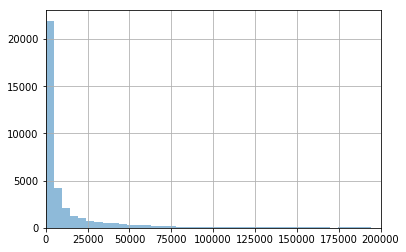

In [16]:
#直方图绘制
plt.xlim(0,200000)
a[cname].hist(alpha=0.5,bins=600)
plt.show()


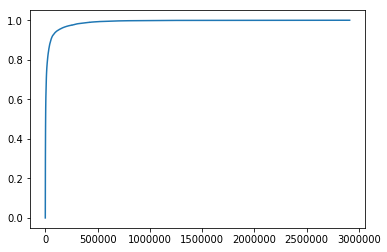

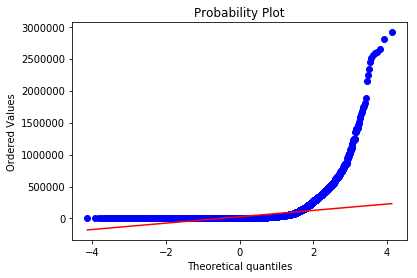

In [17]:
#累计分布图绘制
x1=np.sort(a[cname])
y1=np.arange(len(x1))/float(len(x1))
plt.plot(x1,y1)
plt.show()


#QQ图绘制
stats.probplot(a[cname], dist="norm", plot=plt)
plt.show()


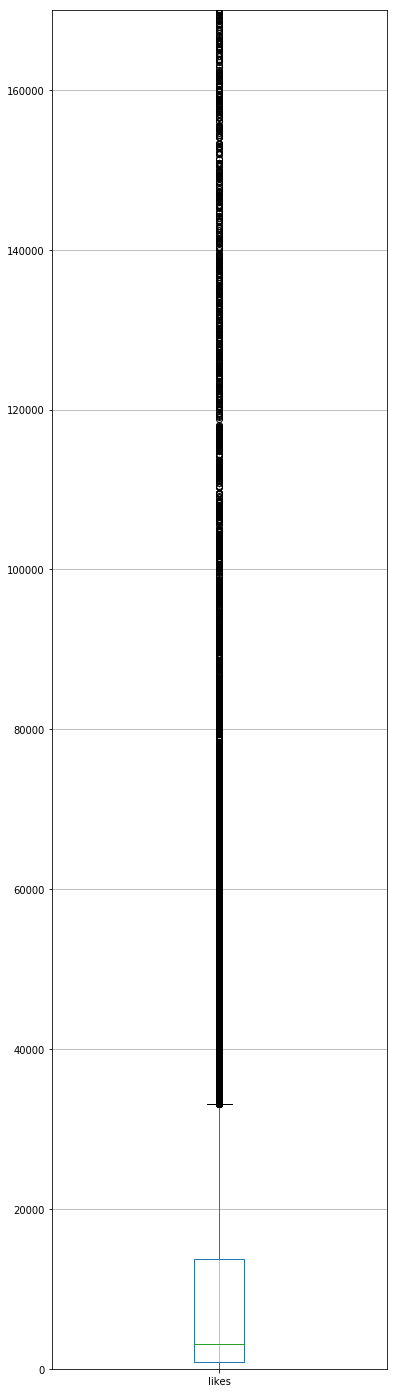

In [18]:
#盒图绘制
a.boxplot(figsize=(6,25))
plt.ylim(0,170000)
plt.show()

## 1.2.3[dislikes]的可视化

In [19]:
cname='dislikes'
a=DataFrame(df,columns=[cname])
a=a.dropna()#去除缺失值
print(a[cname].describe())
loss=len(df)-a[cname].count()
print("缺失值个数：",loss)

count    3.735200e+04
mean     1.665082e+03
std      1.607617e+04
min      0.000000e+00
25%      1.080000e+02
50%      3.260000e+02
75%      1.019250e+03
max      1.545017e+06
Name: dislikes, dtype: float64
缺失值个数： 0


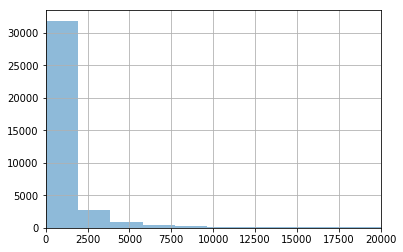

In [20]:

#直方图绘制
plt.xlim(0,20000)
a[cname].hist(alpha=0.5,bins=800)
plt.show()

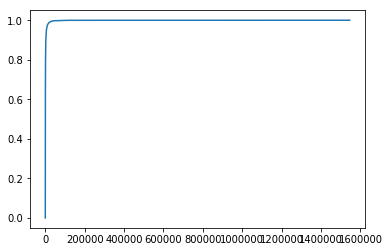

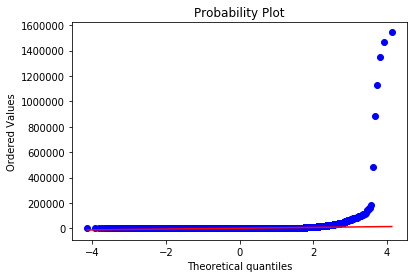

In [21]:

#累计分布图绘制
x1=np.sort(a[cname])
y1=np.arange(len(x1))/float(len(x1))
plt.plot(x1,y1)
plt.show()
#QQ图绘制
#x_label = stats.norm.ppf(y)
#plt.scatter(x_label, x)
#plt.show()
stats.probplot(a[cname], dist="norm", plot=plt)
plt.show()

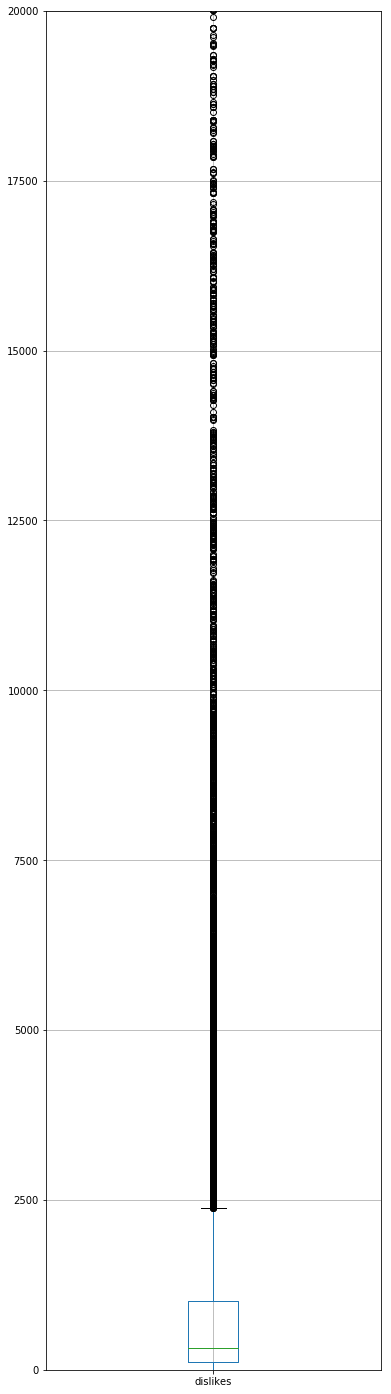

In [22]:

#盒图绘制
a.boxplot(figsize=(6,25))
plt.ylim(0,20000)
plt.show()


## 1.2.4 [comment_count]的可视化

In [23]:
cname='comment_count'
a=DataFrame(df,columns=[cname])
a=a.dropna()#去除缺失值
print(a[cname].describe())
loss=len(df)-a[cname].count()
print("缺失值个数：",loss)


count     37352.00000
mean       2676.99743
std       14868.31713
min           0.00000
25%          81.00000
50%         329.00000
75%        1285.00000
max      827755.00000
Name: comment_count, dtype: float64
缺失值个数： 0


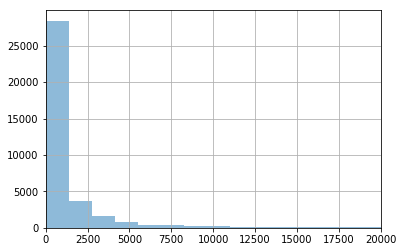

In [24]:
#直方图绘制
plt.xlim(0,20000)
a[cname].hist(alpha=0.5,bins=600)
plt.show()


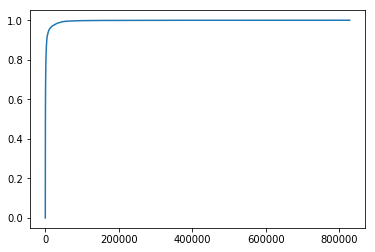

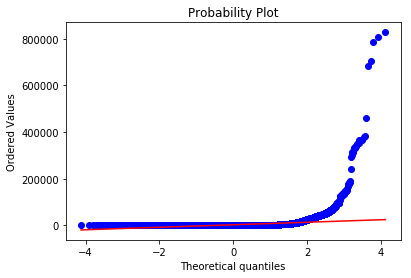

In [25]:
#累计分布图绘制
x1=np.sort(a[cname])
y1=np.arange(len(x1))/float(len(x1))
plt.plot(x1,y1)
plt.show()


#QQ图绘制
stats.probplot(a[cname], dist="norm", plot=plt)
plt.show()


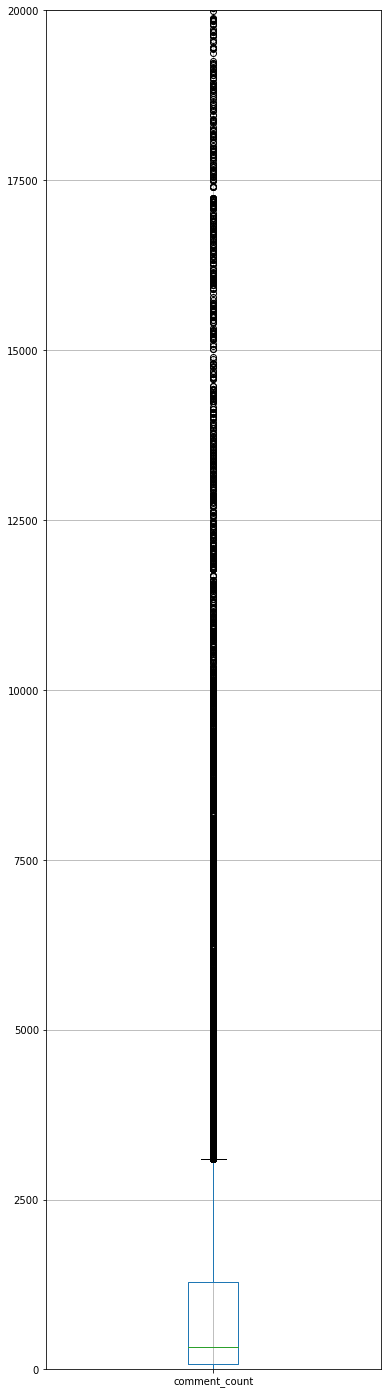

In [26]:
#盒图绘制
a.boxplot(figsize=(6,25))
plt.ylim(0,20000)
plt.show()